# ANN - Lab 1a: Linear Regression #

Tudor Berariu

In [1]:
import numpy as np  # For operations on tensors

%matplotlib notebook
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

## 1. The problem to solve ##

<IPython.core.display.Javascript object>


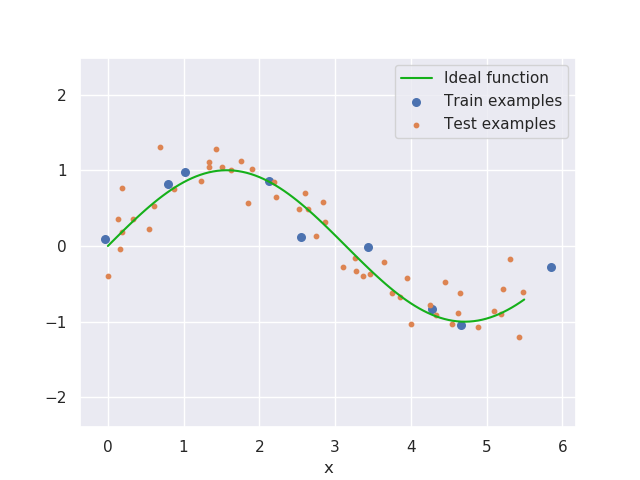

In [2]:
def generate_examples(N:int = 9, noise:float = 0.2, dist_noise:float = 0.2):
    X = np.linspace(0, 1.75 * np.pi, N)
    X += np.random.randn(N) * dist_noise
    T = np.sin(X) + np.random.randn(N) * noise
    return X, T

N_train = 9
N_test = 50
noise = 0.25

X_train, T_train = generate_examples(N=N_train, noise=noise)
X_test, T_test = generate_examples(N=N_test, noise=noise)
X_real, T_real = generate_examples(100, .0, .0)

plt.figure(); plt.axis('equal')
plt.plot(X_real, T_real, sns.xkcd_rgb["green"], label="Ideal function")
plt.scatter(X_train, T_train, s=30, label="Train examples")
plt.scatter(X_test, T_test, s=10, label="Test examples")
plt.xlabel("x")
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', ncol=1)
plt.show()

## 2. Extracting polynomial features
$$\phi_i(x) = x^i, \quad 0 \le i \le M$$

In [3]:
def extract_features(X: np.ndarray, M: int) -> np.ndarray:
    # TODO <1> : given X of length N and integer M, compute Phi, a N x (M+1) array
    raise NotImplementedError

In [4]:
extract_features(X_train, 1)

NotImplementedError: 

## 3. The cost function ##
$$MSE = \frac{1}{N}\sum_{n=1}^{N} \left(y_n - t_n\right)^2$$

In [5]:
def mean_squared_error(Y: np.ndarray, T: np.ndarray) -> float:
    # TODO <2> : Given predictions Y and targets T, compute the MSE
    raise NotImplementedError

## 4. Closed form solution for linear models ##
$$ y\left(x, {\bf w}\right) = {\bf \phi}\left(x\right)^\intercal {\bf w}$$
$${\bf w}^* = \left({\bf \Phi}^\intercal {\bf \Phi}\right)^{-1} {\bf \Phi}^\intercal {\bf T} = {\bf \Phi}^{\dagger} {\bf T}$$

In [6]:
def train_params(X, T, M):
    # TODO <3> : Given train examples (X, T), and integer M compute w*
    raise NotImplementedError

In [7]:
def predict(X, W, M):
    # TODO <4> : Given inputs X, weights W, and integer M, compute predictions Y
    raise NotImplementedError

## 5. Visualize the function learned by the model ##

In [ ]:
M = 3

# Train
W = train_params(X_train, T_train, M)

# Compute mean squared error
Y_train = predict(X_train, W, M)
Y_test = predict(X_test, W, M)
print("Train error:", mean_squared_error(Y_train, T_train))
print("Test  error:", mean_squared_error(Y_test, T_test))

# Plot
Y_real = predict(X_real, W, M)

plt.figure(); plt.axis('equal'); plt.ylim(-3, 3)
# plt.plot(X_real, T_real, sns.xkcd_rgb["green"], label="Ideal function")
plt.plot(X_real, Y_real, sns.xkcd_rgb["red"], label="Learned function")
plt.scatter(X_train, T_train, s=100, label="Train examples")
plt.xlabel("x")
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', ncol=1)
plt.show()

## 6. Model selection ##

In [ ]:
train_mse = []
test_mse = []
for M in range(10):
    W = train_params(X_train, T_train, M)
    Y_train = predict(X_train, W, M)
    Y_test = predict(X_test, W, M)
    train_mse.append(mean_squared_error(Y_train, T_train))
    test_mse.append(mean_squared_error(Y_test, T_test))

plt.figure()
plt.plot(range(10), train_mse, sns.xkcd_rgb["green"], label="Train MSE")
plt.plot(range(10), test_mse, sns.xkcd_rgb["red"], label="Test MSE")
plt.xlabel("M (model size / complexity)")
plt.ylabel("MSE")
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.show()